# Implementing SGD to a simple function

## Creating x and y tensors

In [83]:
import torch

x = torch.tensor([4.5], requires_grad=True)
y = torch.tensor([4.5], requires_grad=True)
print(x)
print(y)

tensor([4.5000], requires_grad=True)
tensor([4.5000], requires_grad=True)


## Implementing SGD over the simple function

In this lesson we are going to find the minimum point of $z = x^2 + 2y^2 + 2xy + x$ using the stochastic gradient descent (SGD) algorithm.

In [84]:
lr = 0.1
epochs = 100

x_hist = x
y_hist = y

for epoch in range(epochs):
    z = x**2 + 2*y**2 + 2*x*y + x
    z.backward()
    with torch.no_grad():
        x -= lr*x.grad
        y -= lr*y.grad
        x_hist = torch.cat((x_hist, x), dim=0)
        y_hist = torch.cat((y_hist, y), dim=0)
        x.grad.zero_()
        y.grad.zero_()
    if ((epoch==0) or (epoch+1)%10==0):
        print("Epoch:", "{:4d}".format(epoch+1), "=>", 
              "x = ", "{:12.8f}".format(x.item()), 
              "y = ", "{:12.8f}".format(y.item()),
              "z = ", "{:12.8f}".format(z.item()))

Epoch:    1 => x =    2.59999990 y =    1.79999995 z =  105.75000000
Epoch:   10 => x =   -0.00829259 y =   -0.10845397 z =    0.10629910
Epoch:   20 => x =   -0.55292273 y =    0.22369374 z =   -0.37631679
Epoch:   30 => x =   -0.79804587 y =    0.37518549 z =   -0.47476208
Epoch:   40 => x =   -0.90877289 y =    0.44361854 z =   -0.49485010
Epoch:   50 => x =   -0.95879072 y =    0.47453126 z =   -0.49894917
Epoch:   60 => x =   -0.98138487 y =    0.48849523 z =   -0.49978554
Epoch:   70 => x =   -0.99159116 y =    0.49480304 z =   -0.49995625
Epoch:   80 => x =   -0.99620157 y =    0.49765244 z =   -0.49999100
Epoch:   90 => x =   -0.99828422 y =    0.49893957 z =   -0.49999815
Epoch:  100 => x =   -0.99922496 y =    0.49952099 z =   -0.49999970


## Contour plot of z and points produced by SGD

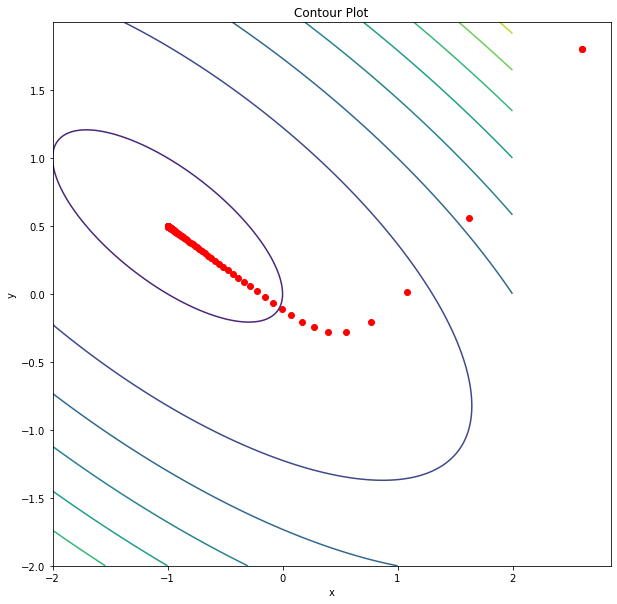

In [90]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-2.0, 2.0, 0.001)
y = np.arange(-2.0, 2.0, 0.001)
X, Y = np.meshgrid(x, y)


# Z = np.sin(X)*np.cos(Y)
Z = X**2 + 2*Y**2 + 2*X*Y + X

fig, ax = plt.subplots(figsize=(10,10))


ax.contour(X,Y,Z)
ax.scatter(x_hist,y_hist, c='Red')

plt.title("Contour Plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()